# Hacking with Fred day

## Goal
* Step 1: Detect 'objects' (for example: your cellphone) -> object detection from sendung mit der Maus

* Step 2: Show the last image of the object with a bounding box around the object. -> AWS Lambda function with S3 image storage. 


* Bonus step: augmented reality location retrieval. 

In [19]:
from PIL import Image
from imageai.Detection import ObjectDetection
import os
import cv2
import datetime

## Step 1: load the model

In [20]:

execution_path = os.getcwd()
model_path = os.path.join(execution_path, "yolo.h5")

if not os.path.exists(model_path):
    print("ERROR! Download the model from here: https://github.com/OlafenwaMoses/ImageAI/releases/download/1.0/yolo.h5")
    exit(-1)


# Create the object detection network
detector = ObjectDetection()
detector.setModelTypeAsYOLOv3()
detector.setModelPath(model_path)
detector.loadModel(detection_speed="faster")



## Step 2: get an image and detect object in this image

In [58]:
detector.detectObjectsFromImage?

In [56]:

frame_bgr = cv2.imread("image1.jpg")
frame_rgb = cv2.cvtColor(frame_bgr, cv2.COLOR_BGR2RGB)
frame_rgb = cv2.resize(frame_rgb, dsize=(640, 480))

output_image_rgb, detections = detector.detectObjectsFromImage(input_image=frame_rgb, input_type='array', output_type='array', minimum_percentage_probability=20)
output_image_bgr = cv2.cvtColor(output_image_rgb, cv2.COLOR_RGB2BGR)

for eachObject in detections: 
    print(eachObject["name"], eachObject["percentage_probability"])
    cv2.imwrite("saved_images/"+eachObject["name"]+".jpg", output_image_bgr)
    
h,w,c = output_image_bgr.shape

apple 37.10067272186279
cup 57.13750720024109
cup 99.22648668289185
cup 99.77595210075378


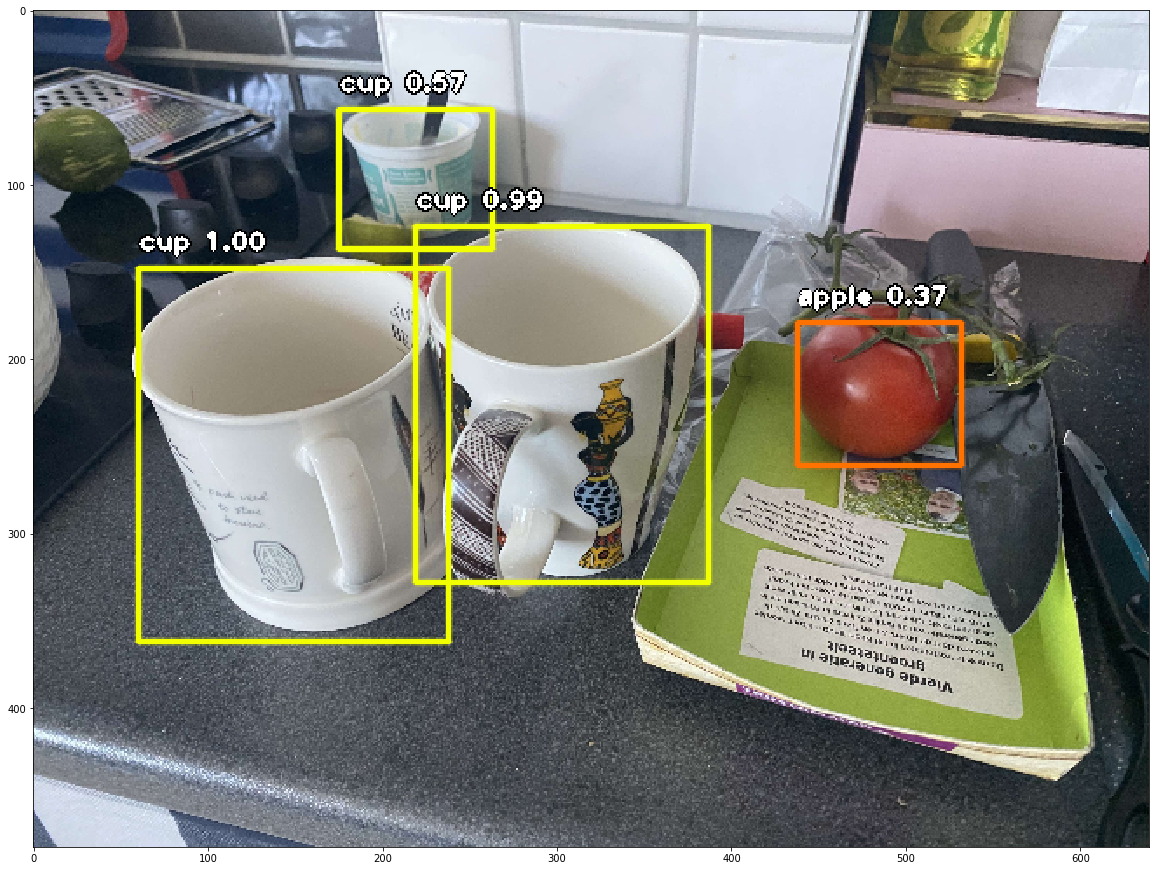

In [57]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
plt.imshow(output_image_rgb)

In [52]:
detections

[]

Welcome to the search engine. What are you searching?teddy bear
Thank you, searching for teddy bear


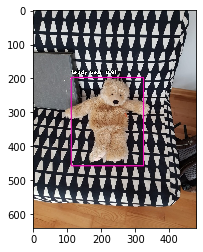

In [49]:
query = input("Welcome to the search engine. What are you searching?")
print("Thank you, searching for", query)
image_bgr = cv2.imread("saved_images/"+query+".jpg")
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)

In [33]:
image_bgr

In [59]:
import logging
import boto3
from botocore.exceptions import ClientError


def upload_file(file_name, bucket, object_name=None):
    """Upload a file to an S3 bucket

    :param file_name: File to upload
    :param bucket: Bucket to upload to
    :param object_name: S3 object name. If not specified then file_name is used
    :return: True if file was uploaded, else False
    """

    # If S3 object_name was not specified, use file_name
    if object_name is None:
        object_name = file_name

    # Upload the file
    s3_client = boto3.client('s3')
    try:
        response = s3_client.upload_file(file_name, bucket, object_name)
    except ClientError as e:
        logging.error(e)
        return False
    return True


ModuleNotFoundError: No module named 'boto3'

In [60]:
!pip3 install boto3


     |████████████████████████████████| 129 kB 1.3 MB/s eta 0:00:01
     |████████████████████████████████| 6.5 MB 3.0 MB/s eta 0:00:01     |████████████████████████████▍   | 5.7 MB 3.0 MB/s eta 0:00:01
     |████████████████████████████████| 69 kB 1.8 MB/s eta 0:00:01
     |████████████████████████████████| 547 kB 3.0 MB/s eta 0:00:01    |████▏                           | 71 kB 2.9 MB/s eta 0:00:01     |████████████▋                   | 215 kB 3.0 MB/s eta 0:00:01     |███████████████████████████████▊| 542 kB 3.0 MB/s eta 0:00:01
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


## Another cool thing
* Upload and download images in the cloud
* Process an entire video
* Train a head on top of the detector to detect custom objects. 
* Use an actual webcam
* Recognize the location (living room, bathroom)

Snippet provided by teachable machine

In [4]:
import tensorflow.keras
from PIL import Image, ImageOps
import numpy as np

# Disable scientific notation for clarity
np.set_printoptions(suppress=True)

# Load the model
model = tensorflow.keras.models.load_model('teachable_machine/keras_model.h5')

# Create the array of the right shape to feed into the keras model
# The 'length' or number of images you can put into the array is
# determined by the first position in the shape tuple, in this case 1.
data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)


[[0.7580857  0.01895772 0.22295661]]


In [5]:
# Replace this with the path to your image
image = Image.open('saved_images/bear-in-wohnzimmer.jpeg')

#resize the image to a 224x224 with the same strategy as in TM2:
#resizing the image to be at least 224x224 and then cropping from the center
size = (224, 224)
image = ImageOps.fit(image, size, Image.ANTIALIAS)

#turn the image into a numpy array
image_array = np.asarray(image)

# display the resized image
image.show()

# Normalize the image
normalized_image_array = (image_array.astype(np.float32) / 127.0) - 1

# Load the image into the array
data[0] = normalized_image_array

# run the inference
prediction = model.predict(data)
print(prediction)

[[0.9026489  0.00082689 0.09652413]]
